<a href="https://colab.research.google.com/github/Venu2791/Quiz/blob/master/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [26]:
# https://keras.io/
!pip install -q keras
import datetime
import keras
print(datetime.datetime.now())

2019-09-04 17:48:01.236948


In [27]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-09-04 17:48:01.253308


### Load pre-shuffled MNIST data into train and test sets

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-09-04 17:48:01.590280


(60000, 28, 28)
2019-09-04 17:48:01.622193


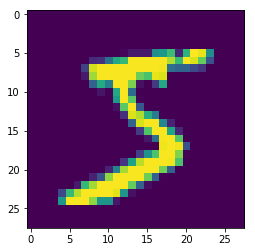

In [29]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [30]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-09-04 17:48:01.837364


In [31]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-09-04 17:48:01.996267


In [32]:
y_train[:10]
print(datetime.datetime.now())

2019-09-04 17:48:02.005134


In [33]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-09-04 17:48:02.020560


In [34]:
Y_train[:10]
print(datetime.datetime.now())

2019-09-04 17:48:02.030506


In [35]:
## MAIN BLOCK
from keras.layers import Activation
from keras.layers import Input, Conv2D,MaxPooling2D
from keras.models import Model

# model = Sequential()

Inputs=Input(shape=(28,28,1))

# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))
x1=Inputs

x2=Conv2D(32,(3,3),border_mode="same",activation="relu")(x1)

merge_1=keras.layers.concatenate([x1,x2],axis=3)

x3=Conv2D(32,(3,3),border_mode="same",activation="relu")(merge_1)

merge_2=keras.layers.concatenate([x1,x2,x3],axis=3)

x4=MaxPooling2D(pool_size=(2, 2))(merge_2)

x5=Conv2D(32,(3,3),border_mode="same",activation="relu")(x4)

merge_3=keras.layers.concatenate([x4,x5],axis=3)

x6=Conv2D(32,(3,3),border_mode="same",activation="relu")(merge_3)

merge_4=keras.layers.concatenate([x4,x5,x6],axis=3)

x7=Conv2D(32,(3,3),border_mode="same",activation="relu")(merge_4)

merge_5=keras.layers.concatenate([x5,x6,x7],axis=3)

x8=MaxPooling2D(pool_size=(2,2))(x7)

x9=Conv2D(32,(3,3),border_mode="same",activation="relu")(x8)

merge_6=keras.layers.concatenate([x8,x9],axis=3)

x10=Conv2D(32,(3,3),border_mode="same")(merge_6)

merge_7=keras.layers.concatenate([x8,x9,x10],axis=3)

x11=Conv2D(32,(3,3),border_mode="same") (merge_7)

x12=Conv2D(10,(7,7))(x11)

x13=Flatten()(x12)

output=Activation("softmax")(x13)

model=Model(inputs=Inputs,outputs=output)

print(datetime.datetime.now())

2019-09-04 17:48:02.233431


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWar

In [36]:
model.summary()

print(datetime.datetime.now())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 28, 28, 32)   320         input_8[0][0]                    
__________________________________________________________________________________________________
concatenate_50 (Concatenate)    (None, 28, 28, 33)   0           input_8[0][0]                    
                                                                 conv2d_64[0][0]                  
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 28, 28, 32)   9536        concatenate_50[0][0]       

In [37]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-09-04 17:48:02.311259


In [38]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.1126 - acc: 0.9654
Epoch 2/10
60000/60000 [==============================] - 31s 515us/step - loss: 0.0469 - acc: 0.9858
Epoch 3/10
60000/60000 [==============================] - 30s 507us/step - loss: 0.0361 - acc: 0.9890
Epoch 4/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.0299 - acc: 0.9905
Epoch 5/10
60000/60000 [==============================] - 30s 498us/step - loss: 0.0256 - acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 30s 492us/step - loss: 0.0238 - acc: 0.9925
Epoch 7/10
60000/60000 [==============================] - 29s 491us/step - loss: 0.0205 - acc: 0.9935
Epoch 8/10
60000/60000 [==============================] - 30s 493us/step - loss: 0.0196 - acc: 0.9941
Epoch 9/10
60000/60000 [==============================] - 30s 493us/step - loss: 0.0180 - acc: 0.9946
Epoch 10/10
60000/60000 [==============================] - 29s 491us/step - loss: 

In [39]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-09-04 17:53:07.509882


In [40]:
print(score)
print(datetime.datetime.now())

[0.03732684087060247, 0.9914]
2019-09-04 17:53:07.523392
